## **Librerías**

In [1]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report, confusion_matrix

## **Datos**

In [5]:
df = sns.load_dataset('iris')

In [7]:
# Separamos la data
X = df.drop('species', axis=1)
y = df[['species']]

In [36]:
y['species'].replace({
    'setosa': 1,
    'versicolor': 2,
    'virginica': 3
}, inplace=True)

C:\Users\jmart\AppData\Local\Temp\ipykernel_15464\2517126737.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y['species'].replace({
C:\Users\jmart\AppData\Local\Temp\ipykernel_15464\2517126737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['species'].replace({


In [37]:
# Dividimos la data entre entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=0.2)

## **Preparación del Pipeline**

In [30]:
# Definimos los pasos a ejecutar
preprocessing_steps = [
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))
]

In [31]:
# Creamos el pipeline
preprocessing_pipeline = Pipeline(preprocessing_steps)

In [42]:
# Aplicamos nuestro pipeline a la data
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)

## **Modelo**

In [43]:
# Inicializamos el modelo
model = RandomForestClassifier(random_state=13)

In [44]:
# Entrenamos el modelo
model.fit(X_train_preprocessed, y_train)

c:\Users\jmart\Documents\Proyectos\Data_Science\Machine_Learning\venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=13)

In [ ]:
X_test_processed = preprocessing_pipeline.transform(X_test)

In [47]:
y_pred = model.predict(X_test_processed)

## **Metricas**

In [46]:
model.score(X_test_processed, y_test)

0.9333333333333333

In [48]:
print(classification_report(y_pred=y_test, y_true=y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      0.80      0.89        10
           3       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.94        30
weighted avg       0.94      0.93      0.93        30



<Axes: >

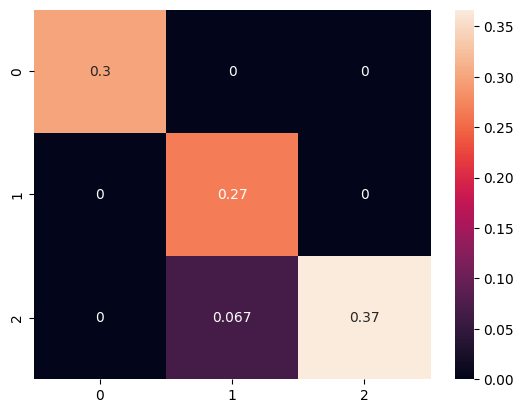

In [51]:
sns.heatmap(confusion_matrix(y_pred=y_pred, y_true=y_test)/len(y_pred), annot=True)